In [1]:
# Carga de las librerías 
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
Datos=pd.read_csv("../data/Datos_Transformados.csv")
Datos.head()

,Airline,Source,Destination,Duration,Total stops,Market,Date,Departure_Day,Departure_Month,Departure_Year,Price
0,Delta,NYC,PAR,610,1,NYC-PAR,2022-02-01,1,2,2022,369.9
1,Delta,NYC,PAR,660,1,NYC-PAR,2022-02-01,1,2,2022,369.9
2,Delta,NYC,PAR,665,1,NYC-PAR,2022-02-01,1,2,2022,369.9
3,Delta,NYC,PAR,685,1,NYC-PAR,2022-02-01,1,2,2022,369.9
4,Delta,NYC,PAR,690,1,NYC-PAR,2022-02-01,1,2,2022,369.9


In [71]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31211 entries, 0 to 31210
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          31211 non-null  object 
 1   Source           31211 non-null  object 
 2   Destination      31211 non-null  object 
 3   Duration         31211 non-null  int64  
 4   Total stops      31211 non-null  int64  
 5   Market           31211 non-null  object 
 6   Date             31211 non-null  object 
 7   Departure_Day    31211 non-null  int64  
 8   Departure_Month  31211 non-null  int64  
 9   Departure_Year   31211 non-null  int64  
 10  Price            31211 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ MB


## Normalizacion

variables Categorias Uso de Dummies

In [72]:
Airline = pd.get_dummies(Datos['Airline'],prefix='Air')

Airline

,Air_Aeroflot,Air_Air Canada,Air_Air France,Air_American Airlines,Air_British Airways,Air_Delta,Air_Emirates,Air_Finnair,"Air_Finnair, American Airlines",Air_KLM,Air_LOT,Air_Lufthansa,"Air_Lufthansa, Egypt Air",Air_Multiple Airlines,Air_Qatar Airways,Air_SAUDIA,Air_SWISS,Air_TAP AIR PORTUGAL,Air_Turkish Airlines,Air_United Airlines
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [73]:
Source = pd.get_dummies(Datos['Source'],prefix='Source')

Source

,Source_NYC,Source_PAR,Source_RUH,Source_SVO
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
31206,0,1,0,0
31207,0,1,0,0
31208,0,1,0,0
31209,0,1,0,0


In [6]:
Destination = pd.get_dummies(Datos['Destination'],prefix='Destination')

Destination

,Destination_NYC,Destination_PAR,Destination_RUH,Destination_SVO
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
31206,1,0,0,0
31207,1,0,0,0
31208,1,0,0,0
31209,1,0,0,0


In [81]:
#Unionde los Dataframe con todas las varibles tranformadas a dummies
Data=Datos[['Total stops','Departure_Day','Departure_Month','Departure_Year','Price']]
Data = pd.concat([Airline, Source, Destination,Data], axis = 1)
Data.head()

,Air_Aeroflot,Air_Air Canada,Air_Air France,Air_American Airlines,Air_British Airways,Air_Delta,Air_Emirates,Air_Finnair,"Air_Finnair, American Airlines",Air_KLM,...,Source_SVO,Destination_NYC,Destination_PAR,Destination_RUH,Destination_SVO,Total stops,Departure_Day,Departure_Month,Departure_Year,Price
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9


In [84]:
Data.describe()

,Air_Aeroflot,Air_Air Canada,Air_Air France,Air_American Airlines,Air_British Airways,Air_Delta,Air_Emirates,Air_Finnair,"Air_Finnair, American Airlines",Air_KLM,...,Source_SVO,Destination_NYC,Destination_PAR,Destination_RUH,Destination_SVO,Total stops,Departure_Day,Departure_Month,Departure_Year,Price
count,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,...,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.0,31211.000000
mean,0.023838,0.059915,0.065265,0.079940,0.048637,0.129826,0.038096,0.040338,0.025312,0.092275,...,0.195188,0.516485,0.179264,0.202621,0.101631,1.374323,16.012848,2.856781,2022.0,1277.985893
std,0.152546,0.237333,0.246998,0.271204,0.215111,0.336117,0.191430,0.196755,0.157072,0.289419,...,0.396351,0.499736,0.383579,0.401959,0.302167,0.620792,8.995516,0.842172,0.0,1139.280123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2022.0,97.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2.000000,2022.0,454.680000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,17.000000,3.000000,2022.0,824.580000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,24.000000,4.000000,2022.0,1684.530000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,31.000000,4.000000,2022.0,13885.290000


### Para normalizar las variables numericas
utilizaremos a MinMaxScaler que pertenece a sklearn y realiza la normalización min-max, que ajusta los datos a un rango específico. Por defecto, este rango es [0, 1]. El proceso consiste en restar el valor mínimo y luego dividir por la diferencia entre el valor máximo y el mínimo de los datos. Como resultado, los valores se escalan dentro del rango especificado, lo que puede ser útil cuando se desea conservar la forma de la distribución original.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
Data['Total stops'] = scaler.fit_transform(Data[['Total stops']])
Data['Departure_Day'] = scaler.fit_transform(Data[['Departure_Day']])
Data['Departure_Month'] = scaler.fit_transform(Data[['Departure_Month']])
Data['Departure_Year'] = scaler.fit_transform(Data[['Departure_Year']])
Data['Price'] = scaler.fit_transform(Data[['Price']])

Data

,Air_Aeroflot,Air_Air Canada,Air_Air France,Air_American Airlines,Air_British Airways,Air_Delta,Air_Emirates,Air_Finnair,"Air_Finnair, American Airlines",Air_KLM,...,Source_SVO,Destination_NYC,Destination_PAR,Destination_RUH,Destination_SVO,Total stops,Departure_Day,Departure_Month,Departure_Year,Price
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.333333,0.966667,1.0,0.0,0.022598
31207,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.333333,0.966667,1.0,0.0,0.022598
31208,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.333333,0.966667,1.0,0.0,0.022598
31209,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.333333,0.966667,1.0,0.0,0.022598


## Modelo

Dividimos los datos en dos conjuntos, uno de entrenamiento (80%) y otro de validación (20%):

In [9]:
train = Data.sample(frac = 0.8, random_state = 1983) # Esta aleatorización depende de pandas
test = Data.drop(train.index)

In [10]:
class Precios_boletos(Dataset):
    def __init__(self, dataframe):
        x = dataframe.iloc[:,0:32].values
        y = dataframe.iloc[:,32].values
    
        self.x_train = torch.tensor(x, dtype=torch.float32)
        self.y_train = torch.tensor(y, dtype=torch.float32)
        
    def __len__(self):
        return len(self.y_train)
    
    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]

In [11]:
datos_train = Precios_boletos(train)
datos_test = Precios_boletos(test)

In [12]:
torch.random.manual_seed(1983) # Esta aleatorización depende de Torch

In [13]:
cargador_datos_train = DataLoader(datos_train, batch_size = 100, shuffle = True)
cargador_datos_test = DataLoader(datos_test, batch_size = 100, shuffle = True)

In [14]:
for i, (data, labels) in enumerate(cargador_datos_train):
  print(data.shape, labels.shape)
  print(data,labels)
  break;

torch.Size([100, 32]) torch.Size([100])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.6667, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.3000, 1.0000, 0.0000],
        [0.0000, 1.0000, 0.0000,  ..., 0.0667, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.5000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.6333, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 1.0000, 0.0000]]) tensor([1.0690e-01, 1.2159e-01, 6.0000e-02, 1.4287e-01, 3.1155e-02, 1.0557e-01,
        2.8316e-02, 6.0313e-02, 1.0557e-01, 3.2722e-02, 2.3896e-01, 4.3237e-02,
        3.3603e-02, 1.8907e-01, 1.0192e-01, 1.5078e-03, 3.7911e-02, 4.9112e-02,
        1.1620e-01, 5.5026e-03, 1.8907e-01, 1.8950e-01, 3.4181e-01, 1.9582e-04,
        3.7676e-02, 3.1449e-02, 4.0183e-02, 5.3694e-02, 2.0228e-02, 1.8920e-01,
        3.6521e-02, 6.0058e-02, 1.0649e-01, 2.0640e-02, 4.4608e-02, 3.0940e-02,
        9.1057e-03, 3.0822e-02, 2.2598e-01, 2.9079e-02, 4.7957e-02, 8.7728e-03,
  

## RED

La red mencionada es una red neuronal con una capa oculta de 16 unidades. La estructura de la red se define en el método __init__() de la clase RedPrecios, donde se crea una instancia de nn.Sequential llamada linear_relu_stack. Dentro de linear_relu_stack, se definen varias capas lineales y funciones de activación ReLU.

Las capas se definen de la siguiente manera:

nn.Linear(32, 16): Capa lineal con 32 unidades de entrada y 16 unidades de salida.

nn.ReLU(): Función de activación ReLU.

nn.Linear(16, 32): Capa lineal con 16 unidades de entrada y 32 unidades de salida.

nn.ReLU(): Función de activación ReLU.

nn.Linear(32, 1): Capa lineal con 32 unidades de entrada y 1 unidad de salida.

En el método forward(), se aplica la operación de propagación hacia adelante de la red. La entrada x se pasa a través de linear_relu_stack y el resultado se asigna a y_pred. Finalmente, y_pred se devuelve como la salida de la red.

In [15]:
class RedPrecios(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        y_pred = self.linear_relu_stack(x)
        return y_pred

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [17]:
torch.random.manual_seed(1984) # Esta aleatorización depende de Torch
modelo = RedPrecios().to(device)
print(modelo)

RedPrecios(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [18]:
for name, param in modelo.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear_relu_stack.0.weight tensor([[-9.1405e-02,  7.2454e-02, -7.4718e-03,  3.5945e-02, -2.0505e-02,
         -1.1935e-01,  2.3989e-02,  3.5338e-03, -1.2308e-01,  9.4704e-02,
         -5.8638e-02,  1.5360e-01,  7.1678e-02, -5.9502e-02, -1.4207e-01,
          6.2604e-02,  7.8168e-02,  1.6657e-01, -3.3260e-02,  1.4719e-01,
         -9.0474e-02,  7.9876e-02,  1.2465e-01, -1.6871e-02,  3.5374e-02,
         -1.3386e-01,  7.2483e-02, -3.7773e-02,  9.3674e-02, -4.9147e-03,
         -1.3574e-01,  6.2061e-02],
        [-1.0889e-01, -7.4343e-02, -4.4457e-02, -9.4570e-02,  1.3460e-01,
          1.5786e-01,  1.4096e-01, -9.6658e-02,  3.9584e-02,  1.2544e-01,
          5.5455e-02, -1.2717e-01,  9.0344e-02,  9.3276e-02, -1.1411e-01,
          8.6039e-04,  7.4954e-02, -1.7209e-01, -5.9232e-02,  5.8135e-02,
          1.2181e-01,  1.3180e-01,  7.1101e-02, -1.2916e-02, -6.8561e-02,
          9.8410e-02,  9.4766e-02, -1.6056e-01,  8.9749e-02, -4.9244e-02,
         -1.2586e-01, -7.3131e-02],
        [-1.3

## Entrenamiento

In [21]:
# Initialize the loss function
fn_perdida = nn.MSELoss(reduction = 'mean')

Optimizador

In [22]:
optimizador = torch.optim.Adam(modelo.parameters(), lr = 0.001)

In [23]:
def ciclo_entrenamiento(dataloader, model, loss_fun, optimizer, monitoreo = False):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        # Calcular las predicciones y la pérdida:
        pred = model(X)[:,-1]
        #print(f"Size Y_pred = {pred.shape}")
        #print(f"Size Y_target = {y.unsqueeze(1).shape}")
        perdida = loss_fun(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        perdida.backward()
        optimizer.step()
        
        if monitoreo:
            if (batch + 1) / num_batches == 1:
                perdida = perdida.item()
                actual =  (batch + 1)
                print(f"Pérdida: {perdida:>0.6f} [{actual:>5d} / {num_batches:>5d}]")
            

def ciclo_testing(dataloader, model, loss_fun, monitoreo = False):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)[:,-1]
            test_loss += loss_fun(pred, y).item()           
    test_loss /= num_batches
    
    if monitoreo:
        print(f"Test Error:  {test_loss:>0.6f}, \n")

In [31]:
epochs = 100
for t in range(epochs):
    #print(f"Epoch {t+1}\n-------------------------------")
    ciclo_entrenamiento(cargador_datos_train, modelo, fn_perdida, optimizador)
    ciclo_testing(cargador_datos_test, modelo, fn_perdida)
print("Done!")

Done!


In [32]:
# Predicciones en entrenamiento:
X_train = np.array(train.iloc[:, 0:32], dtype = 'float32')
with torch.no_grad():
    y_pred_train = modelo(torch.tensor(X_train))[:,-1]

X_test = np.array(test.iloc[:, 0:32], dtype = 'float32')
with torch.no_grad():
    y_pred_test = modelo(torch.tensor(X_test))[:,-1]


correlacion_train = np.corrcoef(y_pred_train.numpy(), np.array(train['Price']))
print(f"La correlación en training es {correlacion_train[0,1]:>0.2f} ")

correlacion_test = np.corrcoef(y_pred_test.numpy(), np.array(test['Price']))
print(f"La correlación en test es {correlacion_test[0,1]:>0.2f} ")

La correlación en training es 0.86 
La correlación en test es 0.86 


In [33]:
#Parametros ajustados
for name, param in modelo.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear_relu_stack.0.weight tensor([[-1.0320e-01,  5.0039e-01, -7.8514e-01,  3.8421e-03, -1.4273e-01,
         -5.2250e-01, -6.6622e-03, -2.8099e-02,  1.2955e-01, -1.3365e-03,
         -1.8735e-01,  4.6345e-01, -2.2469e-01, -1.4921e-01,  9.8764e-02,
          2.4808e-01,  2.9490e-01,  3.4872e-01, -3.2588e-02,  4.3905e-01,
         -4.1768e-01,  1.4355e-01,  1.9919e-01, -2.7687e-01, -8.1994e-02,
         -7.0966e-01,  7.9115e-02, -3.3304e-02,  3.2889e-01,  1.1506e-01,
          2.9502e-01,  6.2061e-02],
        [ 8.2055e-02,  7.2308e-02, -2.9801e-01, -4.4823e-01,  1.9698e-01,
         -1.7823e-01, -1.0128e-02, -5.3098e-02, -1.4543e-01, -1.3427e-02,
          8.9951e-02,  5.5846e-02,  1.4470e-01,  9.9816e-02, -3.4747e-01,
         -3.2631e-01,  5.0542e-02, -3.1455e-01,  3.8531e-01, -4.4914e-01,
          1.5355e-01,  1.2242e-01, -3.3984e-02, -1.2998e-01, -9.6279e-03,
         -2.2115e-02, -9.6309e-02, -1.4507e-01,  6.6933e-01, -8.9028e-02,
         -3.8347e-01, -7.3131e-02],
        [-3.9

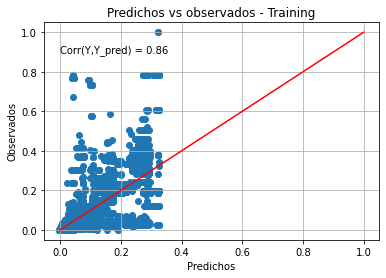

In [34]:
t = np.linspace(0,1,20)
text_cor_train = 'Corr(Y,Y_pred) = ' + str(np.round(correlacion_train[0,1],2))
plt.scatter(y_pred_train, train['Price'])
plt.plot(t, t, 'r-')
plt.text(0,0.9,text_cor_train)
plt.xlabel('Predichos')
plt.ylabel('Observados')
plt.title('Predichos vs observados - Training')
plt.grid()
plt.show()

## Prueba unitaria

In [53]:
Data.tail(1).values

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.96666667,
        1.        , 0.        , 0.02259776]])

In [35]:
S = torch.tensor([0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 1, 0, 0,
        0, 1, 0, 0, 1,0, 0, 0, 0.33333333, 0.96666667,1, 0.], device=device)
with torch.no_grad():
    print(modelo(S))

tensor([0.0242])


In [45]:
a=modelo(S).detach().numpy()

In [83]:
a

array([0.02420963], dtype=float32)

In [54]:
scaler.inverse_transform([a])

array([[431.00460515]])

### Guardar Modelo

In [78]:
model_scripted = torch.jit.script(modelo) # Export to TorchScript
model_scripted.save('modelo_precios_boleto.pt')